In [1]:
%matplotlib inline
import numpy as np
from datetime import timezone, datetime, timedelta
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_ROMS_native, reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift

Matplotlib is building the font cache; this may take a moment.


# Examples of drift simulations for GEO4926

*2025-04-21, kaihc@met.no*

## Cases:

1. **With Stokes drift advection** and no effect of turbulent mixing, 
   i.e. constant depth for each particles throughout.
1. **No Stokes drift advection** and no effect of turbulent mixing, 
   i.e. constant depth for each particles throughout.
1. With Stokes drift advection and **turbulent mixing** (compare with case 1), 
   i.e. each particles moves freely in the vertical with **no buoyancy**.
1. With Stokes drift advection and turbulent mixing, 
   now with an additional **terminal rise velocity added**.
1. **No Stokes drift advection** but with turbulent mixing, 
   with an additional **terminal rise velocity added**.

In [2]:
# Initialise cases
loglev = 20 # Set loglevel to 0 for debugging information
o1 = OceanDrift(loglevel=loglev)  
o2 = OceanDrift(loglevel=loglev) 
o3 = OceanDrift(loglevel=loglev) 
o4 = OceanDrift(loglevel=loglev) 
o5 = OceanDrift(loglevel=loglev) 

# Creating and adding reader for Norkyst current dataset and WW3 wave data set
ocean_data = reader_netCDF_CF_generic.Reader('https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_800m_m00_be')
wave_data = reader_netCDF_CF_generic.Reader('https://thredds.met.no/thredds/dodsC/ww3_4km_agg')


10:16:26 INFO    opendrift:509: OpenDriftSimulation initialised (version 1.13.1)
10:16:26 INFO    opendrift:509: OpenDriftSimulation initialised (version 1.13.1)
10:16:26 INFO    opendrift:509: OpenDriftSimulation initialised (version 1.13.1)
10:16:26 INFO    opendrift:509: OpenDriftSimulation initialised (version 1.13.1)
10:16:26 INFO    opendrift:509: OpenDriftSimulation initialised (version 1.13.1)
10:16:26 INFO    opendrift.readers:61: Opening file with xr.open_dataset
10:16:29 INFO    opendrift.readers.reader_netCDF_CF_generic:332: Detected dimensions: {'x': 'X', 'y': 'Y', 'z': 'depth', 'time': 'time'}
10:16:29 INFO    opendrift.readers.basereader:176: Variable x_sea_water_velocity will be rotated from eastward_sea_water_velocity
10:16:29 INFO    opendrift.readers.basereader:176: Variable y_sea_water_velocity will be rotated from northward_sea_water_velocity
10:16:29 INFO    opendrift.readers.basereader:176: Variable x_wind will be rotated from eastward_wind
10:16:29 INFO    opend

In [3]:
# Initial position
ini_lat = 67.165
ini_lon = 12.197

# Number of particles and their depth distribution
N = 6
zvec = np.linspace(0, -2.5, N)

In [4]:
# First simulation: With Stokes drift advection and no effect of turbulent mixing, 
# i.e. constant depth for each particles throughout.

# Add readers for input data
o1.add_reader([ocean_data, wave_data])

# Configurations
o1.set_config('drift:vertical_mixing', False)
o1.set_config('drift:stokes_drift', True)

# Initialize and run
o1.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.now(), wind_drift_factor=0.0, terminal_velocity=0.0)
o1.run(duration=timedelta(hours=24), time_step=600)

10:19:05 INFO    opendrift.models.basemodel.environment:206: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
10:19:07 INFO    opendrift.models.basemodel.environment:233: Fallback values will be used for the following variables which have no readers: 
10:19:07 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
10:19:07 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_to_direction: 0.000000
10:19:07 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_peak_period_from_variance_spectral_density: 0.000000
10:19:07 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_significant_height: 0.000000
10:19:07 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wind_wave_to_direction: 0.000000
10:19:07 INFO    opendrift.models.base

<xarray.Dataset> Size: 123kB
Dimensions:                                                                              (
                                                                                          trajectory: 6,
                                                                                          time: 145)
Coordinates:
  * trajectory                                                                           (trajectory) int64 48B ...
  * time                                                                                 (time) datetime64[ns] 1kB ...
Data variables: (12/35)
    status                                                                               (trajectory, time) float32 3kB ...
    moving                                                                               (trajectory, time) float32 3kB ...
    age_seconds                                                                          (trajectory, time) float32 3kB ...
    origin_marker                                                                        (trajectory, time) float32 3kB ...
    lon                                                                                  (trajectory, time) float32 3kB ...
    lat                                                                                  (trajectory, time) float32 3kB ...
    ...                                                                                   ...
    surface_downward_y_stress                                                            (trajectory, time) float32 3kB ...
    turbulent_kinetic_energy                                                             (trajectory, time) float32 3kB ...
    turbulent_generic_length_scale                                                       (trajectory, time) float32 3kB ...
    ocean_mixed_layer_thickness                                                          (trajectory, time) float32 3kB ...
    sea_floor_depth_below_sea_level                                                      (trajectory, time) float32 3kB ...
    land_binary_mask                                                                     (trajectory, time) float32 3kB ...
Attributes: (12/153)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    title:                                                                   ...
    summary:                                                                 ...
    keywords:                                                                ...
    ...                                                                                                               ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...
    geospatial_vertical_min:                                                 ...
    geospatial_vertical_max:                                                 ...
    geospatial_vertical_positive:                                            ...

In [5]:
# Second simulation: No Stokes drift advection and no effect of turbulent mixing, 
# i.e. constant depth for each particles throughout.

# Add readers for input data
o2.add_reader([ocean_data, wave_data])

# Configurations
o2.set_config('drift:vertical_mixing', False)
o2.set_config('drift:stokes_drift', False)

# Initialize and run
o2.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.now(), wind_drift_factor=0.0, terminal_velocity=0.0)
o2.run(duration=timedelta(hours=24), time_step=600)

10:22:02 INFO    opendrift.models.basemodel.environment:206: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
10:22:02 INFO    opendrift.models.basemodel.environment:233: Fallback values will be used for the following variables which have no readers: 
10:22:02 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
10:22:02 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_to_direction: 0.000000
10:22:02 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_peak_period_from_variance_spectral_density: 0.000000
10:22:02 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_significant_height: 0.000000
10:22:02 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wind_wave_to_direction: 0.000000
10:22:02 INFO    opendrift.models.base

<xarray.Dataset> Size: 123kB
Dimensions:                                                                              (
                                                                                          trajectory: 6,
                                                                                          time: 145)
Coordinates:
  * trajectory                                                                           (trajectory) int64 48B ...
  * time                                                                                 (time) datetime64[ns] 1kB ...
Data variables: (12/35)
    status                                                                               (trajectory, time) float32 3kB ...
    moving                                                                               (trajectory, time) float32 3kB ...
    age_seconds                                                                          (trajectory, time) float32 3kB ...
    origin_marker                                                                        (trajectory, time) float32 3kB ...
    lon                                                                                  (trajectory, time) float32 3kB ...
    lat                                                                                  (trajectory, time) float32 3kB ...
    ...                                                                                   ...
    surface_downward_y_stress                                                            (trajectory, time) float32 3kB ...
    turbulent_kinetic_energy                                                             (trajectory, time) float32 3kB ...
    turbulent_generic_length_scale                                                       (trajectory, time) float32 3kB ...
    ocean_mixed_layer_thickness                                                          (trajectory, time) float32 3kB ...
    sea_floor_depth_below_sea_level                                                      (trajectory, time) float32 3kB ...
    land_binary_mask                                                                     (trajectory, time) float32 3kB ...
Attributes: (12/153)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    title:                                                                   ...
    summary:                                                                 ...
    keywords:                                                                ...
    ...                                                                                                               ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...
    geospatial_vertical_min:                                                 ...
    geospatial_vertical_max:                                                 ...
    geospatial_vertical_positive:                                            ...

In [6]:
# Third simulation: With Stokes drift advection and turbulent mixing (compare with case 1), 
# i.e. each particles moves freely in the vertical with no buoyancy.

# Add readers for input data
o3.add_reader([ocean_data, wave_data])

# Configurations
o3.set_config('drift:vertical_mixing', True)
o3.set_config('vertical_mixing:diffusivitymodel', 'environment')
o3.set_config('drift:stokes_drift', True)

# Initialize and run
o3.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.now(), wind_drift_factor=0.0, terminal_velocity=0.0)
o3.run(duration=timedelta(hours=24), time_step=600)

10:22:18 INFO    opendrift.models.basemodel.environment:206: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
10:22:18 INFO    opendrift.models.basemodel.environment:233: Fallback values will be used for the following variables which have no readers: 
10:22:18 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
10:22:18 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_to_direction: 0.000000
10:22:18 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_peak_period_from_variance_spectral_density: 0.000000
10:22:18 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_significant_height: 0.000000
10:22:18 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wind_wave_to_direction: 0.000000
10:22:18 INFO    opendrift.models.base

<xarray.Dataset> Size: 123kB
Dimensions:                                                                              (
                                                                                          trajectory: 6,
                                                                                          time: 145)
Coordinates:
  * trajectory                                                                           (trajectory) int64 48B ...
  * time                                                                                 (time) datetime64[ns] 1kB ...
Data variables: (12/35)
    status                                                                               (trajectory, time) float32 3kB ...
    moving                                                                               (trajectory, time) float32 3kB ...
    age_seconds                                                                          (trajectory, time) float32 3kB ...
    origin_marker                                                                        (trajectory, time) float32 3kB ...
    lon                                                                                  (trajectory, time) float32 3kB ...
    lat                                                                                  (trajectory, time) float32 3kB ...
    ...                                                                                   ...
    surface_downward_y_stress                                                            (trajectory, time) float32 3kB ...
    turbulent_kinetic_energy                                                             (trajectory, time) float32 3kB ...
    turbulent_generic_length_scale                                                       (trajectory, time) float32 3kB ...
    ocean_mixed_layer_thickness                                                          (trajectory, time) float32 3kB ...
    sea_floor_depth_below_sea_level                                                      (trajectory, time) float32 3kB ...
    land_binary_mask                                                                     (trajectory, time) float32 3kB ...
Attributes: (12/153)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    title:                                                                   ...
    summary:                                                                 ...
    keywords:                                                                ...
    ...                                                                                                               ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...
    geospatial_vertical_min:                                                 ...
    geospatial_vertical_max:                                                 ...
    geospatial_vertical_positive:                                            ...

In [7]:
# Fourth simulation: With Stokes drift advection and turbulent mixing, 
# now with an additional terminal rise velocity added.

# Add readers for input data
o4.add_reader([ocean_data, wave_data])

# Configurations
o4.set_config('drift:vertical_mixing', True)
o4.set_config('vertical_mixing:diffusivitymodel', 'environment')
o4.set_config('drift:stokes_drift', True)

# Initialize and run, rise velocity of 5 mm/s.
o4.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.now(), wind_drift_factor=0.0, terminal_velocity=0.005)
o4.run(duration=timedelta(hours=24), time_step=600)

10:22:34 INFO    opendrift.models.basemodel.environment:206: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
10:22:34 INFO    opendrift.models.basemodel.environment:233: Fallback values will be used for the following variables which have no readers: 
10:22:34 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
10:22:34 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_to_direction: 0.000000
10:22:34 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_peak_period_from_variance_spectral_density: 0.000000
10:22:34 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_significant_height: 0.000000
10:22:34 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wind_wave_to_direction: 0.000000
10:22:34 INFO    opendrift.models.base

<xarray.Dataset> Size: 123kB
Dimensions:                                                                              (
                                                                                          trajectory: 6,
                                                                                          time: 145)
Coordinates:
  * trajectory                                                                           (trajectory) int64 48B ...
  * time                                                                                 (time) datetime64[ns] 1kB ...
Data variables: (12/35)
    status                                                                               (trajectory, time) float32 3kB ...
    moving                                                                               (trajectory, time) float32 3kB ...
    age_seconds                                                                          (trajectory, time) float32 3kB ...
    origin_marker                                                                        (trajectory, time) float32 3kB ...
    lon                                                                                  (trajectory, time) float32 3kB ...
    lat                                                                                  (trajectory, time) float32 3kB ...
    ...                                                                                   ...
    surface_downward_y_stress                                                            (trajectory, time) float32 3kB ...
    turbulent_kinetic_energy                                                             (trajectory, time) float32 3kB ...
    turbulent_generic_length_scale                                                       (trajectory, time) float32 3kB ...
    ocean_mixed_layer_thickness                                                          (trajectory, time) float32 3kB ...
    sea_floor_depth_below_sea_level                                                      (trajectory, time) float32 3kB ...
    land_binary_mask                                                                     (trajectory, time) float32 3kB ...
Attributes: (12/153)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    title:                                                                   ...
    summary:                                                                 ...
    keywords:                                                                ...
    ...                                                                                                               ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...
    geospatial_vertical_min:                                                 ...
    geospatial_vertical_max:                                                 ...
    geospatial_vertical_positive:                                            ...

In [8]:
# Fifth simulation: No Stokes drift advection but with turbulent mixing, 
# with an additional terminal rise velocity added.

# Add readers for input data
o5.add_reader([ocean_data, wave_data])

# Configurations
o5.set_config('drift:vertical_mixing', True)
o5.set_config('vertical_mixing:diffusivitymodel', 'environment')
o5.set_config('drift:stokes_drift', False)

# Initialize and run, rise velocity of 5 mm/s.
o5.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.now(), wind_drift_factor=0.0, terminal_velocity=0.005)
o5.run(duration=timedelta(hours=24), time_step=600)

10:22:48 INFO    opendrift.models.basemodel.environment:206: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
10:22:48 INFO    opendrift.models.basemodel.environment:233: Fallback values will be used for the following variables which have no readers: 
10:22:48 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
10:22:48 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_to_direction: 0.000000
10:22:48 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_peak_period_from_variance_spectral_density: 0.000000
10:22:48 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_swell_wave_significant_height: 0.000000
10:22:48 INFO    opendrift.models.basemodel.environment:236: 	sea_surface_wind_wave_to_direction: 0.000000
10:22:48 INFO    opendrift.models.base

<xarray.Dataset> Size: 123kB
Dimensions:                                                                              (
                                                                                          trajectory: 6,
                                                                                          time: 145)
Coordinates:
  * trajectory                                                                           (trajectory) int64 48B ...
  * time                                                                                 (time) datetime64[ns] 1kB ...
Data variables: (12/35)
    status                                                                               (trajectory, time) float32 3kB ...
    moving                                                                               (trajectory, time) float32 3kB ...
    age_seconds                                                                          (trajectory, time) float32 3kB ...
    origin_marker                                                                        (trajectory, time) float32 3kB ...
    lon                                                                                  (trajectory, time) float32 3kB ...
    lat                                                                                  (trajectory, time) float32 3kB ...
    ...                                                                                   ...
    surface_downward_y_stress                                                            (trajectory, time) float32 3kB ...
    turbulent_kinetic_energy                                                             (trajectory, time) float32 3kB ...
    turbulent_generic_length_scale                                                       (trajectory, time) float32 3kB ...
    ocean_mixed_layer_thickness                                                          (trajectory, time) float32 3kB ...
    sea_floor_depth_below_sea_level                                                      (trajectory, time) float32 3kB ...
    land_binary_mask                                                                     (trajectory, time) float32 3kB ...
Attributes: (12/153)
    Conventions:                                                             ...
    standard_name_vocabulary:                                                ...
    featureType:                                                             ...
    title:                                                                   ...
    summary:                                                                 ...
    keywords:                                                                ...
    ...                                                                                                               ...
    geospatial_lon_units:                                                    ...
    geospatial_lon_resolution:                                               ...
    runtime:                                                                 ...
    geospatial_vertical_min:                                                 ...
    geospatial_vertical_max:                                                 ...
    geospatial_vertical_positive:                                            ...

10:23:03 WARNING opendrift:2429: Plotting fast. This will make your plots less accurate.


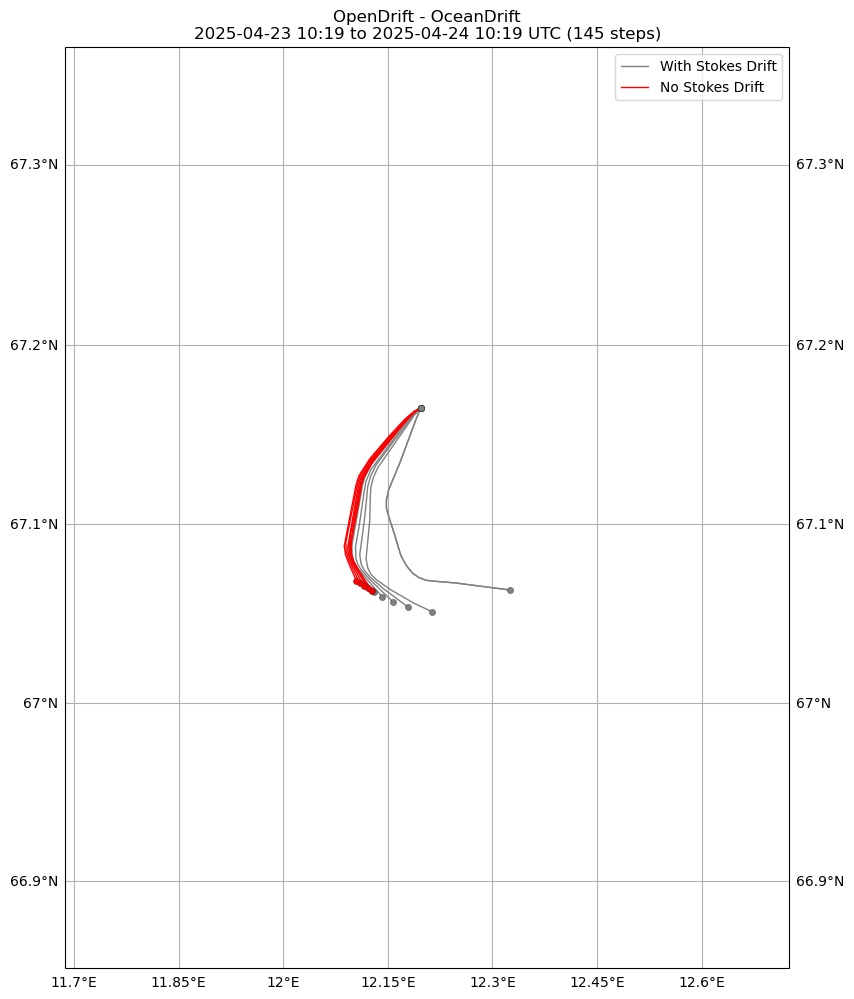

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:19 to 2025-04-24 10:19 UTC (145 steps)'}>,
 <Figure size 864.43x1100 with 1 Axes>)

In [9]:
# Plot differences between case 1 and 2:
o1.plot(compare=o2, fast=True, legend=['With Stokes Drift', 'No Stokes Drift'])

10:23:04 WARNING opendrift:2429: Plotting fast. This will make your plots less accurate.


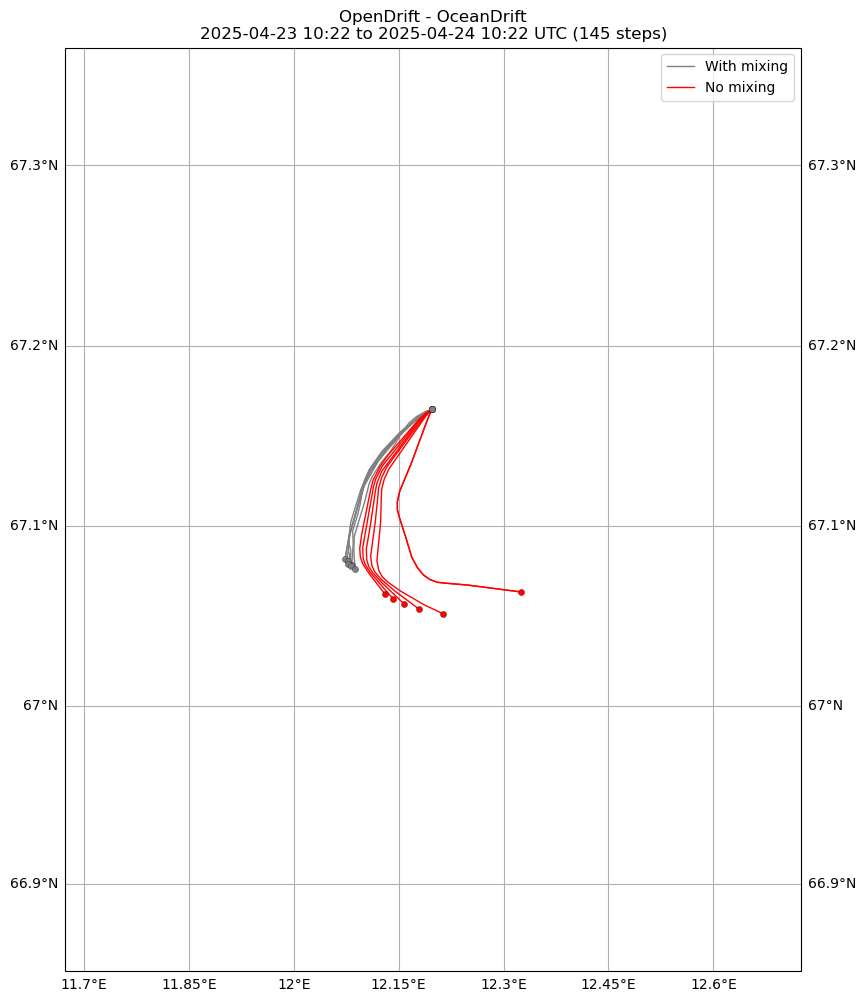

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:22 to 2025-04-24 10:22 UTC (145 steps)'}>,
 <Figure size 876.426x1100 with 1 Axes>)

In [10]:
# Plot differences between case 1 and 3:
o3.plot(compare=o1, fast=True, legend=['With mixing', 'No mixing'])

10:23:05 WARNING opendrift:2429: Plotting fast. This will make your plots less accurate.


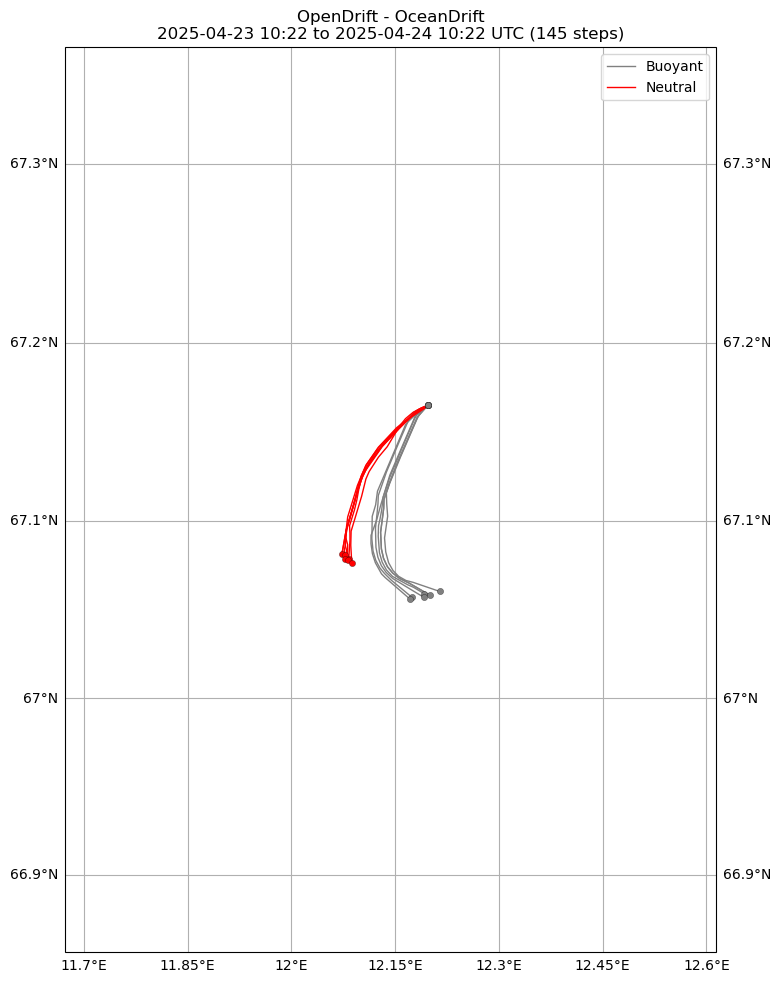

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:22 to 2025-04-24 10:22 UTC (145 steps)'}>,
 <Figure size 791.476x1100 with 1 Axes>)

In [11]:
# Plot differences between case 3 and 4:
o4.plot(compare=o3, fast=True, legend=['Buoyant', 'Neutral'])

10:23:05 WARNING opendrift:2429: Plotting fast. This will make your plots less accurate.


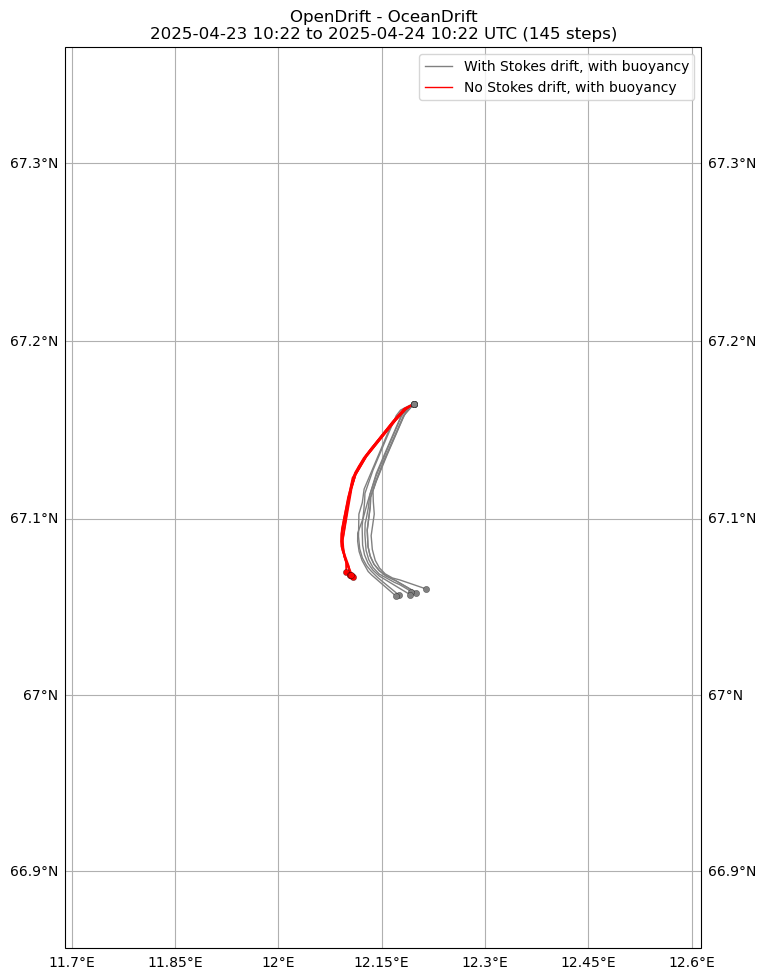

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:22 to 2025-04-24 10:22 UTC (145 steps)'}>,
 <Figure size 776.723x1100 with 1 Axes>)

In [12]:
# Plot differences between case 4 and 5.
o4.plot(compare=o5, fast=True, legend=['With Stokes drift, with buoyancy', 'No Stokes drift, with buoyancy'])

10:23:06 WARNING opendrift:2429: Plotting fast. This will make your plots less accurate.


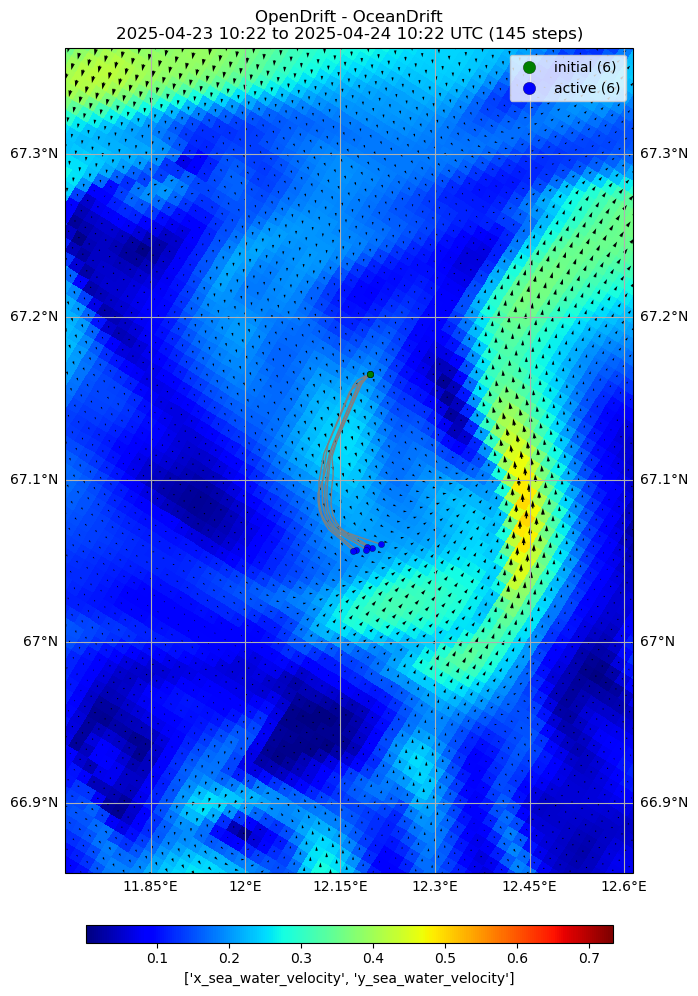

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:22 to 2025-04-24 10:22 UTC (145 steps)'}>,
 <Figure size 756.401x1100 with 2 Axes>)

In [13]:
# Plot background currents
o4.plot(fast=True, background=['x_sea_water_velocity', 'y_sea_water_velocity'])

10:23:11 WARNING opendrift:2429: Plotting fast. This will make your plots less accurate.


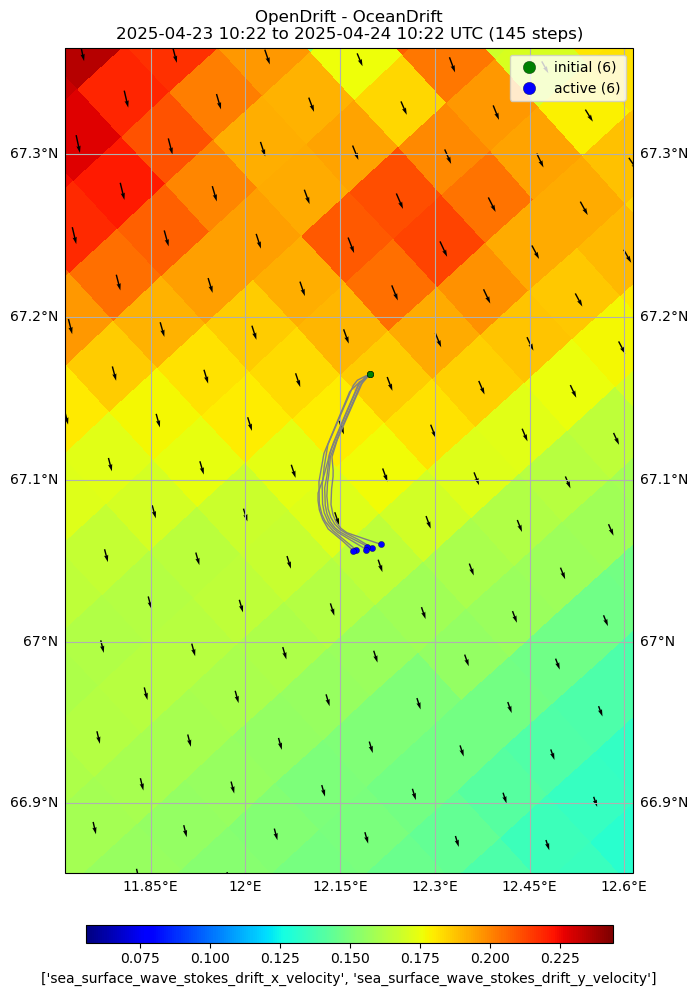

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2025-04-23 10:22 to 2025-04-24 10:22 UTC (145 steps)'}>,
 <Figure size 756.401x1100 with 2 Axes>)

In [14]:
# Plot background Stokes drift 
o4.plot(fast=True, background=['sea_surface_wave_stokes_drift_x_velocity', 'sea_surface_wave_stokes_drift_y_velocity'])

In [15]:
o1

--------------------
Reader performance:
--------------------
https://thredds.met.no/thredds/dodsC/fou-hi/norkystv3_800m_m00_be
 0:03:23.9  total
 0:00:00.0  preparing
 0:03:23.2  reading
 0:00:02.0  interpolation
 0:00:00.2  interpolation_time
 0:00:00.6  rotating vectors
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/ww3_4km_agg
 0:00:20.9  total
 0:00:00.0  preparing
 0:00:20.5  reading
 0:00:00.1  interpolation
 0:00:00.0  interpolation_time
 0:00:00.3  rotating vectors
 0:00:00.0  masking
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
Performance:
 5:36.6 total time
 2:41.6 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
 2:55.0 main loop
      0.0 updating elements
    0.0 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.13.1)
	6 active Lagrangian3DArray particles  (0 deactivated, 0 scheduled)
-----------